# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [162]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [163]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API call
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp_kelvin = response['main']['temp_max']
        city_max_temp_celsius = city_max_temp_kelvin - 273.15
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp (C)": city_max_temp_celsius,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tarawa
Processing Record 2 of Set 1 | lubango
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | gulf shores
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ceelbuur
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | angra do heroismo
Processing Record 21 of Set 1 | wailua homesteads
Processi

In [164]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            566
Lat             566
Lng             566
Max Temp (C)    566
Humidity        566
Cloudiness      566
Wind Speed      566
Country         566
Date            566
dtype: int64

In [165]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,tarawa,1.4190,172.9840,30.05,79,20,2.57,KI,1723668504
1,lubango,-14.9172,13.4925,14.92,31,2,2.57,AO,1723668505
2,hilo,19.7297,-155.0900,28.86,76,0,3.60,US,1723668506
3,gulf shores,30.2460,-87.7008,34.65,72,15,1.34,US,1723668507
4,grytviken,-54.2811,-36.5092,-4.85,72,73,5.15,GS,1723668508


In [166]:
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [167]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarawa,1.4190,172.9840,30.05,79,20,2.57,KI,1723668504
1,lubango,-14.9172,13.4925,14.92,31,2,2.57,AO,1723668505
2,hilo,19.7297,-155.0900,28.86,76,0,3.60,US,1723668506
3,gulf shores,30.2460,-87.7008,34.65,72,15,1.34,US,1723668507
4,grytviken,-54.2811,-36.5092,-4.85,72,73,5.15,GS,1723668508


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

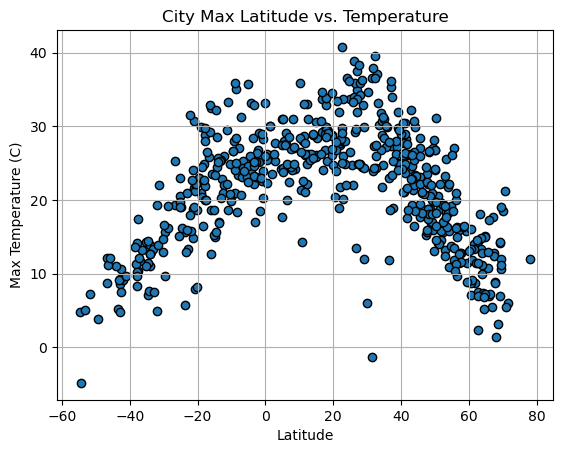

In [168]:
# Build scatter plot for latitude vs. temperature
city_lat = city_data_df["Lat"]
city_max_temp = city_data_df["Max Temp (C)"]

# Incorporate the other graph properties
plt.scatter(city_lat, city_max_temp, marker="o", edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

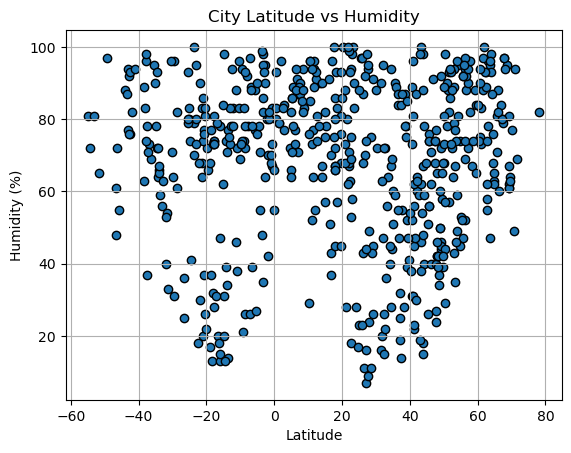

In [169]:
# Build the scatter plots for latitude vs. humidity
city_lat = city_data_df["Lat"]
city_humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(city_lat, city_humidity, marker="o", edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

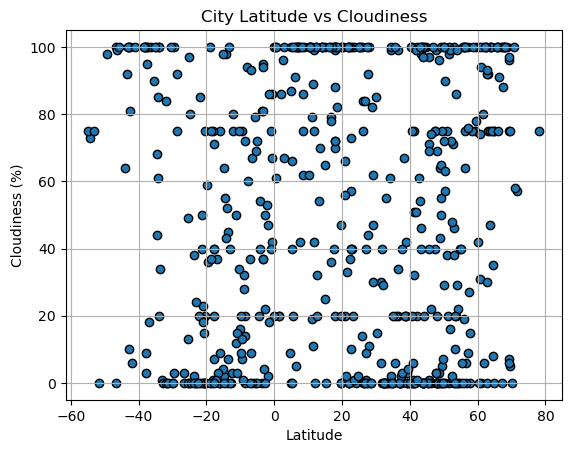

In [170]:
# Build the scatter plots for latitude vs. cloudiness
city_lat = city_data_df["Lat"]
city_clouds = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(city_lat, city_clouds, marker="o", edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

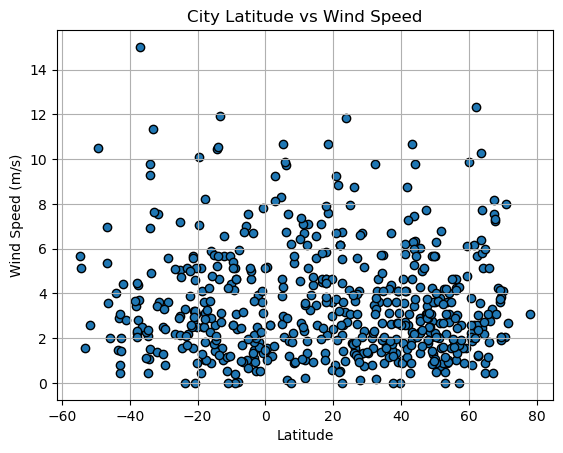

In [171]:
# Build the scatter plots for latitude vs. wind speed
city_lat = city_data_df["Lat"]
city_wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(city_lat, city_wind, marker="o", edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [172]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

In [173]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tarawa,1.4190,172.9840,30.05,79,20,2.57,KI,1723668504
2,hilo,19.7297,-155.0900,28.86,76,0,3.60,US,1723668506
3,gulf shores,30.2460,-87.7008,34.65,72,15,1.34,US,1723668507
7,ceelbuur,4.6850,46.6176,24.20,72,9,8.33,SO,1723668512
10,college,64.8569,-147.8028,15.04,63,75,0.45,US,1723668516


In [174]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lubango,-14.9172,13.4925,14.92,31,2,2.57,AO,1723668505
4,grytviken,-54.2811,-36.5092,-4.85,72,73,5.15,GS,1723668508
5,edinburgh of the seven seas,-37.0676,-12.3116,11.77,73,18,15.02,SH,1723668510
6,adamstown,-25.0660,-130.1015,20.52,80,97,5.03,PN,1723668511
8,port-aux-francais,-49.3500,70.2167,3.77,97,98,10.48,TF,1723668513


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4424842595808368


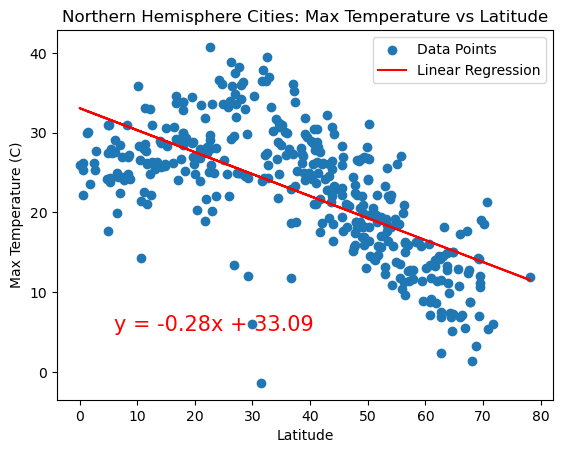

In [175]:
# Linear regression on Northern Hemisphere
latitude = northern_hemi_df['Lat']
max_temp = northern_hemi_df['Max Temp (C)']
slope, intercept, r_value, p_value, std_err = linregress(latitude, max_temp)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, max_temp, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min() + 6, max_temp.min() + 6, equation, color='red', fontsize=15, ha='left', va='bottom')

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Cities: Max Temperature vs Latitude')
plt.legend()
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig3.png")
plt.show()

The r^2-value is: 0.6177110262178569


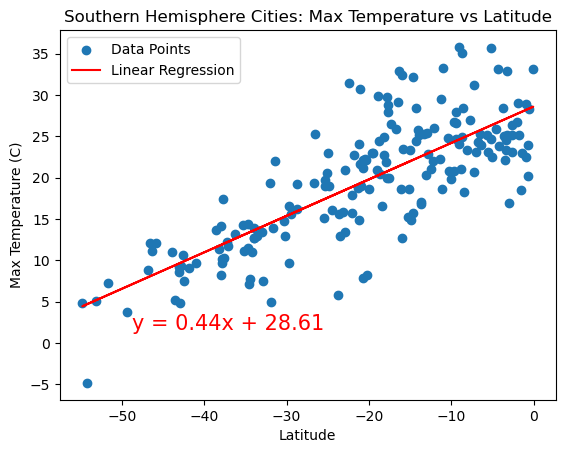

In [176]:
# Linear regression on Southern Hemisphere
latitude = southern_hemi_df['Lat']
max_temp = southern_hemi_df['Max Temp (C)']
slope, intercept, r_value, p_value, std_err = linregress(latitude, max_temp)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, max_temp, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min() + 6, max_temp.min() + 6, equation, color='red', fontsize=15, ha='left', va='bottom')

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Cities: Max Temperature vs Latitude')
plt.legend()
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig4.png")
plt.show()

**Discussion about the linear relationship:** The Southern Hemisphere Cities have closer data points of correlation than the Northern Cities. In the southern cities as they get closer to the equator the max temperature rises. With the northern hemisphere cities you can still argue as the cities get farther away from the equator (their latitude increases) the temperature decreases resulting in the negative correlation, but there must be outliers and other considerations to factor in that spreads out the data further than in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.000598098510463169


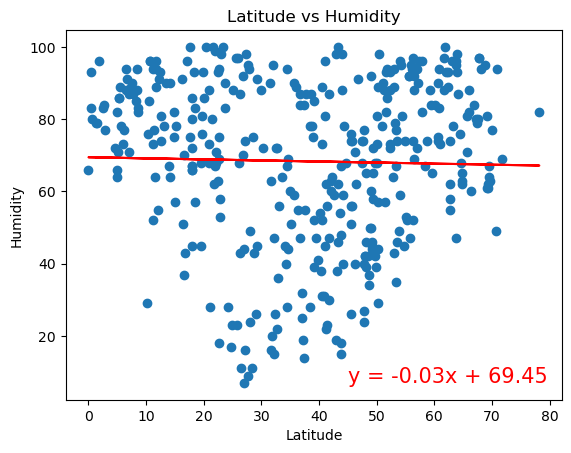

In [177]:
# Northern Hemisphere
latitude = northern_hemi_df['Lat']
city_humidity = northern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_humidity)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_humidity, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min() +45, city_humidity.min(), equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig5.png")
plt.show()

The r^2-value is: 0.005200227618212535


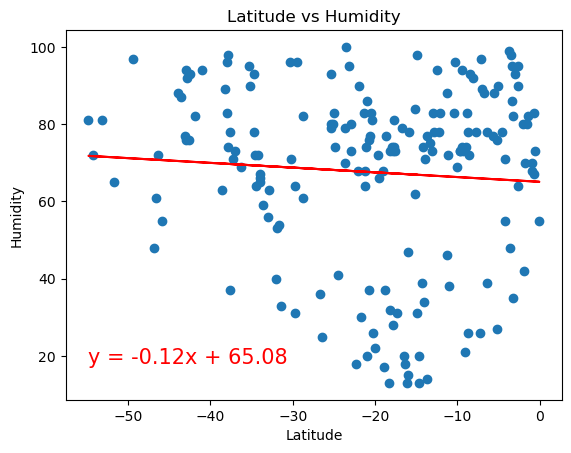

In [178]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
city_humidity = southern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_humidity)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_humidity, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min(), city_humidity.min() +5, equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig6.png")
plt.show()

**Discussion about the linear relationship:** The data points are widely dispersed around the regression line, showing a lot of variability in humidity levels regardless of latitude. The slope of the regression line is close to zero, indicating that latitude is not a significant predictor of humidity. Other factors, such as local geography, proximity to bodies of water, and weather patterns, likely play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.004825830852723745


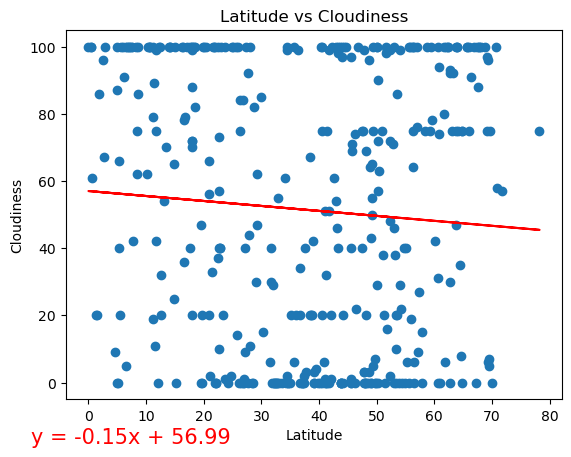

In [179]:
# Northern Hemisphere
latitude = northern_hemi_df['Lat']
city_clouds = northern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_clouds)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_clouds, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min() -10, city_clouds.min() -18, equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig7.png")
plt.show()

The r^2-value is: 0.06853397135752087


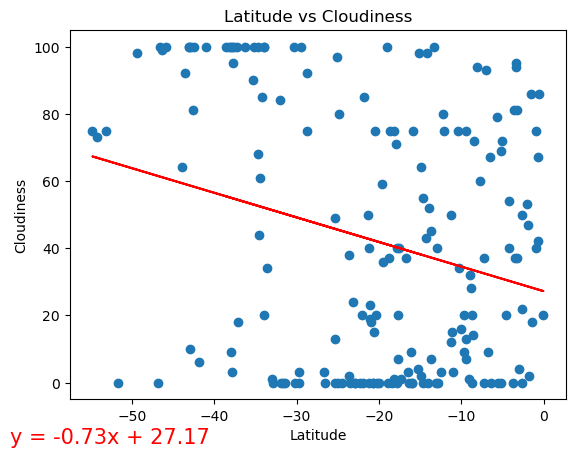

In [180]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
city_clouds = southern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_clouds)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_clouds, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min() -10, city_clouds.min() -18, equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig8.png")
plt.show()

**Discussion about the linear relationship:** The first plot shows a slight negative correlation with a slope of -0.15. This indicates that as latitude increases, cloudiness decreases slightly, but the relationship is not strong.
The second plot also shows a negative correlation with a slightly steeper slope of -0.73.
This suggests that as latitude decreases (moving further south), cloudiness decreases slightly as well, but again, the relationship is weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.009693796559464403


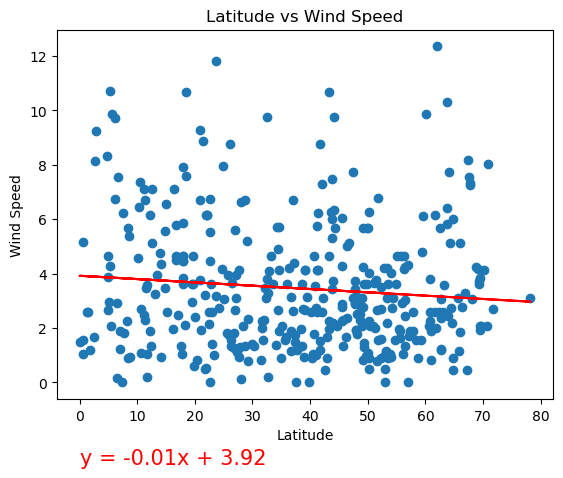

In [181]:
# Northern Hemisphere
latitude = northern_hemi_df['Lat']
city_wind = northern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_wind)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_wind, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min(), city_wind.min() -3, equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig9.png")
plt.show()

The r^2-value is: 0.009847531090513279


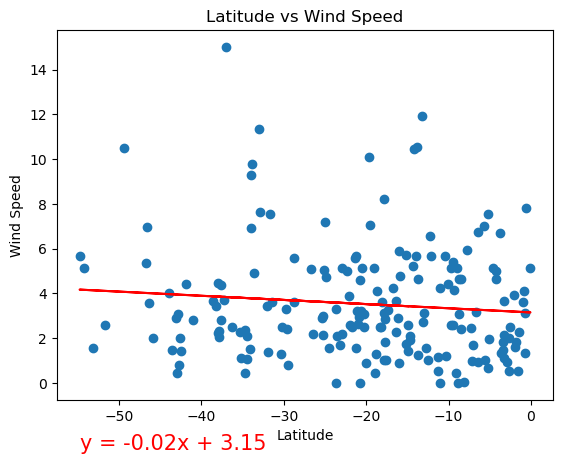

In [182]:
# Southern Hemisphere
latitude = southern_hemi_df['Lat']
city_wind = southern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(latitude, city_wind)
regression_line = slope * latitude + intercept

# Plot the data and regression line
plt.scatter(latitude, city_wind, label='Data Points')
plt.plot(latitude, regression_line, color='red', label='Linear Regression')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(latitude.min(), city_wind.min() -3, equation, color='red', fontsize=15)

# Calculate the R-squared value
r_squared = r_value**2

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
print(f"The r^2-value is: {r_squared}")
plt.savefig("Fig9.png")
plt.show()

**Discussion about the linear relationship:** In both hemispheres, the linear relationship between latitude and wind speed is essentially flat, indicating that latitude does not have a noticeable effect on wind speed across different latitudes.